In [70]:
library(EBImage)
library(keras)

In [71]:
#setwd("../input/planecars")

pics <- c('../input/planecars/p1.jpg', '../input/planecars/p2.jpg', '../input/planecars/p3.jpg', '../input/planecars/p4.jpg', '../input/planecars/p5.jpg', '../input/planecars/p6.jpg', 
         '../input/planecars/c1.jpg', '../input/planecars/c2.jpg', '../input/planecars/c3.jpg' ,'../input/planecars/c4.jpg', '../input/planecars/c5.jpg', '../input/planecars/c6.jpg')


mypic <- list()


for (i in 1:12) {mypic[[i]] <- readImage(pics[i])}

#readImage("../input/planecars/c1.jpg")

Image 
  colorMode    : Color 
  storage.mode : double 
  dim          : 281 180 3 
  frames.total : 3 
  frames.render: 1 

imageData(object)[1:5,1:6,1]
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]    1    1    1    1    1    1
[2,]    1    1    1    1    1    1
[3,]    1    1    1    1    1    1
[4,]    1    1    1    1    1    1
[5,]    1    1    1    1    1    1


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9529  1.0000  0.9283  1.0000  1.0000 

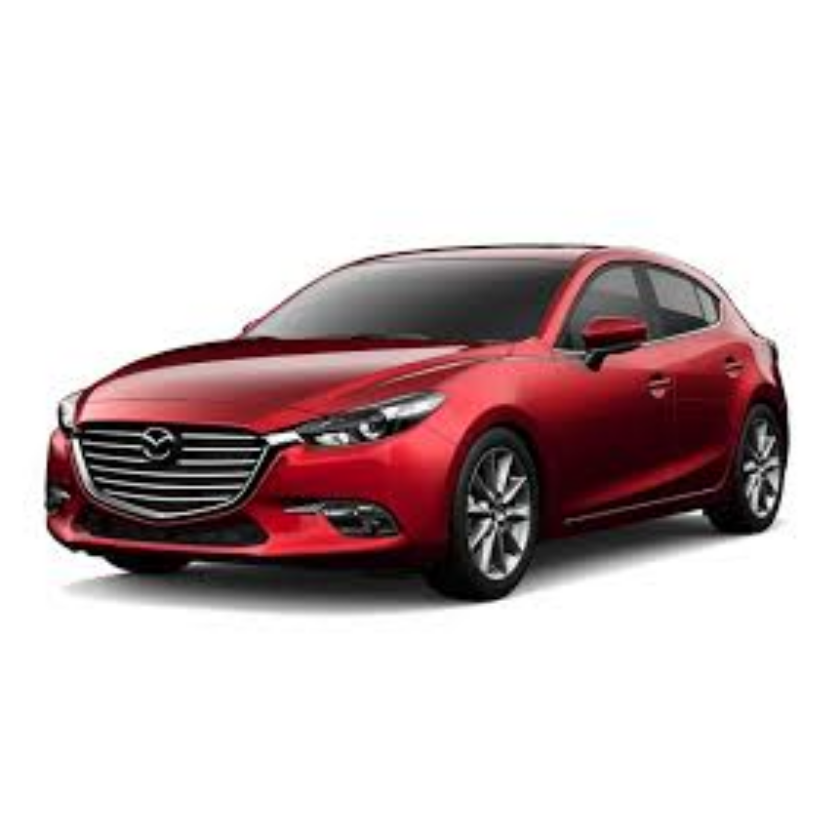

In [72]:
# Explore

print(mypic[[1]])

display(mypic[[8]])

summary(mypic[[1]])

In [73]:
str(mypic)

List of 12
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:281, 1:180, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:272, 1:185, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:341, 1:148, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:318, 1:159, 1:3] 0.255 0.255 0.255 0.259 0.259 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:275, 1:183, 1:3] 0.49 0.49 0.49 0.49 0.49 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  .. ..@ .Data    : num [1:277, 1:182, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ colormode: int 2
 $ :Formal class 'Image' [package "EBImage"] with 2 slots
  ..

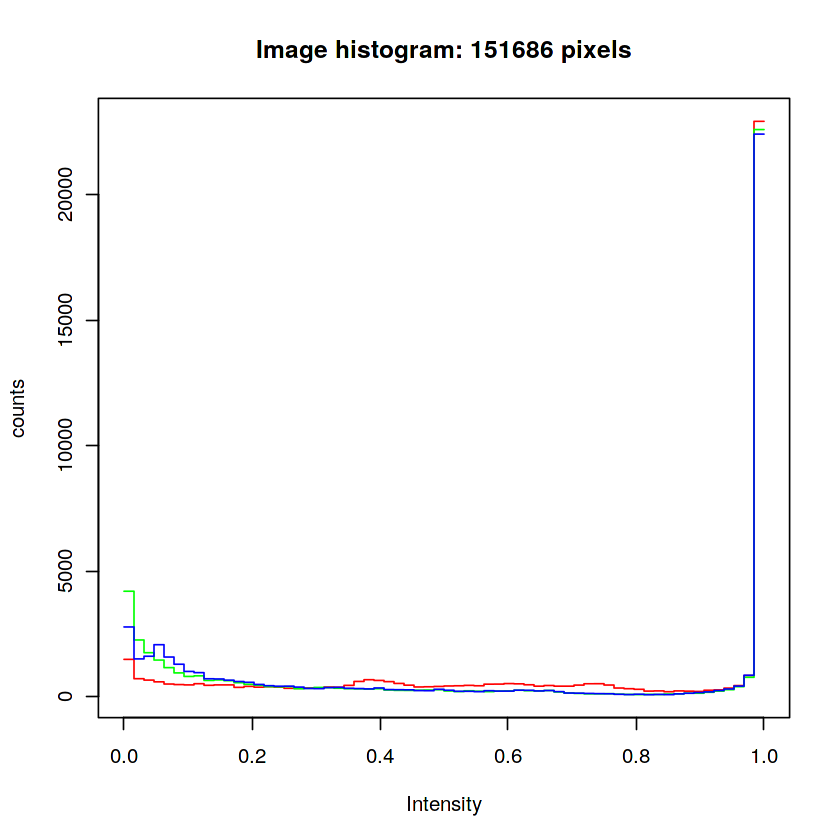

In [74]:
hist(mypic[[12]])

In [75]:
# Resize all the images to 28X28

for(i in 1:12) {mypic[[i]] <- resize(mypic[[i]], 28, 28)}

In [76]:
# Reshape

for (i in 1:12) {mypic[[i]] <- array_reshape(mypic[[i]], c(28, 28, 3))}

In [77]:
# Row Bind

trainx <- NULL

for (i in 1:5) {trainx <- rbind(trainx, mypic[[i]])}

for (i in 7:11) {trainx <- rbind(trainx, mypic[[i]])}


str(trainx)

 num [1:10, 1:2352] 1 1 1 0.26 0.49 ...


In [92]:
testx <- rbind(mypic[[6]], mypic[[12]])

str(testx)

 num [1:2, 1:2352] 1 1 1 1 1 1 1 1 1 1 ...


In [79]:
trainy <- c(0,0,0,0,0,1,1,1,1,1)

testy <- c(0, 1)

In [80]:
# One Hot Encoding

trainLabels <- to_categorical(trainy)

testLabels <- to_categorical(testy)

trainLabels

In [81]:
# Model 

model <- keras_model_sequential()

model %>%
        layer_dense(units = 256, activation = 'relu', input_shape = c(2352)) %>%
        layer_dense(units = 128, activation = 'relu') %>%
        layer_dense(units = 2, activation = 'softmax')

summary(model)

Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_9 (Dense)                     (None, 256)                     602368      
________________________________________________________________________________
dense_10 (Dense)                    (None, 128)                     32896       
________________________________________________________________________________
dense_11 (Dense)                    (None, 2)                       258         
Total params: 635,522
Trainable params: 635,522
Non-trainable params: 0
________________________________________________________________________________


In [82]:
# Comile

model %>% 
        compile(loss = 'binary_crossentropy',
                optimizer = optimizer_rmsprop(),
                metrics = c('accuracy'))

In [86]:
# Fit model

history <- model %>%
                fit(trainx,
                   trainLabels,
                   epochs = 30,
                   batch_size = 32,
                   validation_split = 0.2)


history

Trained on 8 samples (batch_size=32, epochs=30)
Final epoch (plot to see history):
        loss: 5.767
    accuracy: 0.625
    val_loss: 15.38
val_accuracy: 0 

`geom_smooth()` using formula 'y ~ x'



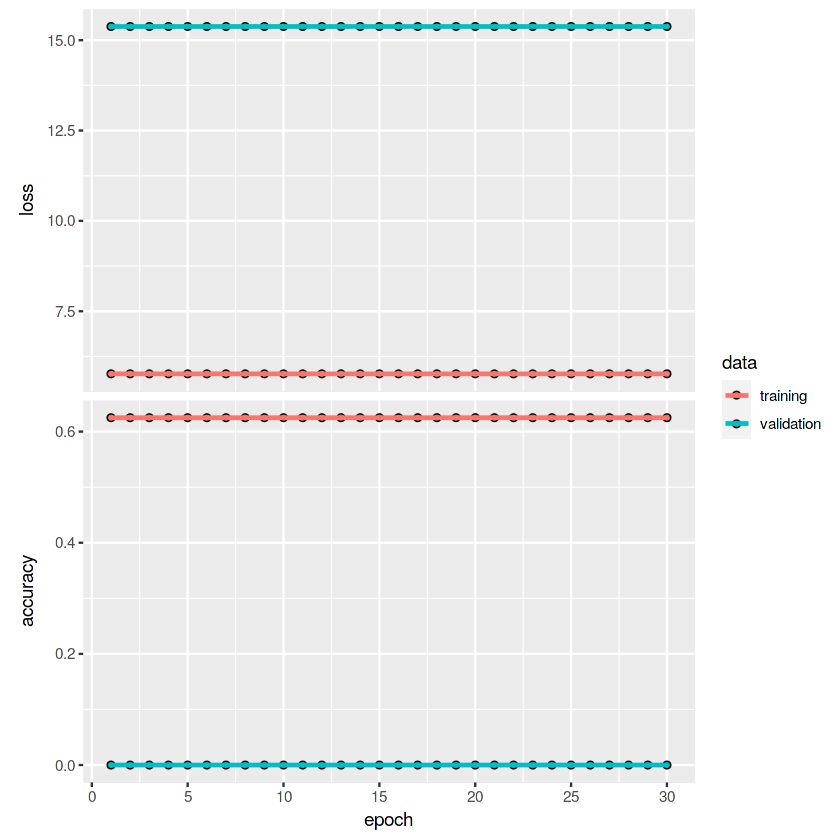

In [91]:
plot(history)

In [87]:
# Evaluation & Prediction - train data

model %>% evaluate(trainx, trainLabels)

$loss
[1] 7.689546

$accuracy
[1] 0.5

In [88]:
pred <- model %>% predict_classes(trainx)

table(predicted = pred, Actual = trainy)

         Actual
predicted 0 1
        0 5 5

In [89]:
# Evaluation & Prediction - test data

model %>% evaluate(testx, testLabels)

$loss
[1] 7.689547

$accuracy
[1] 0.5

In [90]:
pred <- model %>% predict_classes(testx)

table(Predicted = pred, Actual = testy)

         Actual
Predicted 0 1
        0 1 1